In [1]:
from pandas_datareader.data import DataReader
import requests_cache
import pandas as pd
import numpy as np
from matplotlib import pyplot
import pandas_ta as pta

### Scrapping & Preparing Data from Web

In [2]:
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite')

# just add headers to your session and provide it to the reader
session.headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',
                   'Accept': 'application/json;charset=utf-8'}

def get_adj_close(tickers, start_date, end_date):
    returns_df = pd.DataFrame()
    for ticker in tickers:
        # retrieve stock data (includes Date, OHLC, Volume, Adjusted Close)
        try:
          s = DataReader(ticker, 'yahoo', start_date, end_date, session=session)
          returns_df[ticker] = s['Adj Close']
        except:
          print(ticker)
    return returns_df

In [3]:
data = pd.read_csv('C:\\Users\\Guo Xiong\\Documents\\Y3S1\\BT4222\\Project\\Apple_sentiment.csv')
data = data.iloc[:,1:]
data = data.sort_values(by = 'Date')
data.head(2).append(data.tail(2))

,Date,Text,neg,neu,pos,compound,probability,sentiment
12425,2006-12-13,Apple seems to be humming right along. Its sto...,0.000,0.899,0.101,0.6808,0.991674,NEGATIVE
12059,2006-12-13,Apple Computer's shares are up after Morgan St...,0.083,0.792,0.125,0.2960,0.940315,NEGATIVE
11962,2021-11-11,U.S. stock futures were little changed in earl...,0.000,0.881,0.119,0.7003,0.999685,NEGATIVE
1290,2021-11-11,Disney's earnings report Wednesday told a fami...,0.000,0.898,0.102,0.5789,0.988439,NEGATIVE


In [4]:
AAPL_start_date = '2016-01-01'  # Using earlier dates for calculation of SMA later
AAPL_end_date = '2020-01-28'

In [5]:
AAPL_data = DataReader('AAPL', 'yahoo', AAPL_start_date, AAPL_end_date)
AAPL_data.columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
AAPL_data['Close'] = AAPL_data['Close'].shift(1)
AAPL_data = AAPL_data[1:]
AAPL_data['Movement'] = np.where(AAPL_data['Close'] > AAPL_data['Close'].shift(1),1,0)
AAPL_data['price_diff'] = AAPL_data['Close'].diff()
AAPL_data['TNX'] = DataReader('^TNX', 'yahoo', AAPL_start_date, AAPL_end_date)['Close']
#AAPL_data['Movement'] = np.where(AAPL_data['Close'] < AAPL_data['Close'].shift(-1),1,0)
#AAPL_data['price_diff'] = AAPL_data['Close'].diff().shift(-1)
AAPL_data.head(5).append(AAPL_data.tail(5))

,High,Low,Open,Close,Volume,Adj Close,Movement,price_diff,TNX
Date,,,,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.315001,270597600.0,24.251434,0,NaN,2.245
2016-01-05,26.462500,25.602501,26.437500,26.337500,223164000.0,23.643713,1,0.022499,2.248
2016-01-06,25.592501,24.967501,25.139999,25.677500,273829600.0,23.181009,0,-0.660000,2.177
2016-01-07,25.032499,24.107500,24.670000,25.174999,324377600.0,22.202671,0,-0.502501,2.153
2016-01-08,24.777500,24.190001,24.637501,24.112499,283192000.0,22.320063,0,-1.062500,2.130
2021-11-05,152.199997,150.059998,151.889999,150.960007,65414600.0,151.279999,0,-0.529999,1.453
2021-11-08,151.570007,150.160004,151.410004,151.279999,55020900.0,150.440002,1,0.319992,1.497
2021-11-09,151.429993,150.059998,150.199997,150.440002,56787900.0,150.809998,0,-0.839996,1.432
2021-11-10,150.130005,147.850006,150.020004,150.809998,65187100.0,147.919998,1,0.369995,1.560


In [6]:
#SMA
AAPL_data['SMA20'] = AAPL_data['Close'].rolling(window=20).mean() 
AAPL_data['SMA50'] = AAPL_data['Close'].rolling(window=50).mean() 
AAPL_data['SMA100'] = AAPL_data['Close'].rolling(window=100).mean() 

#EMA
AAPL_data['EMA10'] = AAPL_data['Close'].ewm(span=10, adjust=False).mean() 
AAPL_data['EMA20'] = AAPL_data['Close'].ewm(span=20, adjust=False).mean() 
AAPL_data['EMA40'] = AAPL_data['Close'].ewm(span=40, adjust=False).mean() 

#MACD
exp1 = AAPL_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = AAPL_data['Close'].ewm(span=26, adjust=False).mean()
AAPL_data['MACD'] = exp1-exp2
AAPL_data['Signal'] = AAPL_data['MACD'].ewm(span=9, adjust=False).mean()

#RSI 
AAPL_data['RSI'] = pta.rsi(AAPL_data['Close'], length = 14)

In [7]:
AAPL_data

,High,Low,Open,Close,Volume,Adj Close,Movement,price_diff,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
Date,,,,,,,,,,,,,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.315001,270597600.0,24.251434,0,NaN,2.245,NaN,NaN,NaN,26.315001,26.315001,26.315001,0.000000,0.000000,NaN
2016-01-05,26.462500,25.602501,26.437500,26.337500,223164000.0,23.643713,1,0.022499,2.248,NaN,NaN,NaN,26.319091,26.317143,26.316098,0.001795,0.000359,NaN
2016-01-06,25.592501,24.967501,25.139999,25.677500,273829600.0,23.181009,0,-0.660000,2.177,NaN,NaN,NaN,26.202438,26.256225,26.284947,-0.049469,-0.009607,NaN
2016-01-07,25.032499,24.107500,24.670000,25.174999,324377600.0,22.202671,0,-0.502501,2.153,NaN,NaN,NaN,26.015631,26.153251,26.230803,-0.129155,-0.033516,NaN
2016-01-08,24.777500,24.190001,24.637501,24.112499,283192000.0,22.320063,0,-1.062500,2.130,NaN,NaN,NaN,25.669607,25.958894,26.127471,-0.274873,-0.081788,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,152.199997,150.059998,151.889999,150.960007,65414600.0,151.279999,0,-0.529999,1.453,147.504001,147.4758,145.4751,149.751450,148.388174,147.297837,1.482398,1.077012,59.115354
2021-11-08,151.570007,150.160004,151.410004,151.279999,55020900.0,150.440002,1,0.319992,1.497,147.923001,147.5506,145.6864,150.029368,148.663586,147.492089,1.521095,1.165829,59.874833
2021-11-09,151.429993,150.059998,150.199997,150.440002,56787900.0,150.809998,0,-0.839996,1.432,148.304501,147.5874,145.8729,150.104029,148.832769,147.635890,1.467072,1.226077,56.887424


In [8]:
AAPL_data = AAPL_data.reset_index()
AAPL_data['Date'] = AAPL_data['Date'].apply(lambda x: x.strftime("%Y-%m-%dT%H:%M:%S")[:10]) #transform from datetime64 to date object
AAPL_data = AAPL_data.iloc[99:]     # dropping first 99 columns for NA SMA100
AAPL_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Movement,price_diff,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
99,2016-05-25,24.934999,24.5275,24.667500,24.475000,152675200.0,23.197218,1,0.367500,1.870,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
100,2016-05-26,25.182501,24.6600,24.920000,24.905001,225324800.0,23.381176,1,0.430000,1.823,23.530250,25.54455,25.035825,23.980320,24.099908,24.627777,-0.329940,-0.610638,57.545633
101,2016-05-27,25.117500,24.8125,24.860001,25.102501,145364800.0,23.367199,1,0.197500,1.851,23.600000,25.51675,25.023475,24.184353,24.195393,24.650934,-0.213864,-0.531283,59.582066
102,2016-05-31,25.100000,24.7050,24.900000,25.087500,169228800.0,23.253099,0,-0.015001,1.834,23.682625,25.48950,25.017575,24.348561,24.280355,24.672230,-0.121681,-0.449363,59.349199
103,2016-06-01,24.885000,24.5825,24.754999,24.965000,116693200.0,22.927101,0,-0.122499,1.846,23.760375,25.45920,25.015475,24.460641,24.345560,24.686512,-0.057843,-0.371059,57.377131


In [9]:
AAPL_merged = pd.merge(data, AAPL_data, left_on = 'Date', right_on = 'Date', how = 'inner')
AAPL_merged

,Date,Text,neg,neu,pos,compound,probability,sentiment,High,Low,...,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
0,2016-05-25,By David Randall NEW YORK Reuters A small ...,0.029,0.874,0.097,0.9927,0.992909,NEGATIVE,24.934999,24.527500,...,1.87,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
1,2016-05-25,NEW DELHI Reuters India has said Apple Inc...,0.006,0.945,0.050,0.8658,0.999746,NEGATIVE,24.934999,24.527500,...,1.87,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
2,2016-05-25,James Saft is a Reuters columnist The opinio...,0.064,0.787,0.149,0.9976,0.997293,NEGATIVE,24.934999,24.527500,...,1.87,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
3,2016-05-25,By Julia Fioretti and Conor Humphries BRUSSELS...,0.049,0.829,0.123,0.9919,0.988899,NEGATIVE,24.934999,24.527500,...,1.87,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
4,2016-05-25,By Julia Love and Alexandria Sage SAN FRANCISC...,0.014,0.930,0.056,0.9769,0.993394,NEGATIVE,24.934999,24.527500,...,1.87,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,2021-11-10,The rate of consumer price increases jumped to...,0.085,0.915,0.000,-0.4404,0.826909,NEGATIVE,150.130005,147.850006,...,1.56,148.769501,147.54120,146.076400,150.232387,149.021076,147.790724,1.437542,1.268370,57.884203
26566,2021-11-10,"Shares of Affirm, the digital ""buy now, pay la...",0.027,0.853,0.120,0.5859,0.996631,NEGATIVE,150.130005,147.850006,...,1.56,148.769501,147.54120,146.076400,150.232387,149.021076,147.790724,1.437542,1.268370,57.884203
26567,2021-11-10,The EU's General Court ruled Wednesday that th...,0.000,0.973,0.027,0.0772,0.757227,NEGATIVE,150.130005,147.850006,...,1.56,148.769501,147.54120,146.076400,150.232387,149.021076,147.790724,1.437542,1.268370,57.884203
26568,2021-11-11,U.S. stock futures were little changed in earl...,0.000,0.881,0.119,0.7003,0.999685,NEGATIVE,149.429993,147.679993,...,1.56,149.120001,147.46300,146.232600,149.811952,148.916212,147.797030,1.167482,1.248193,48.459639


In [10]:
AAPL_merged.columns

Index(['Date', 'Text', 'neg', 'neu', 'pos', 'compound', 'probability',
       'sentiment', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Movement', 'price_diff', 'TNX', 'SMA20', 'SMA50', 'SMA100', 'EMA10',
       'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI'],
      dtype='object')

In [11]:
test  = AAPL_merged.copy()
test = test.groupby('Date').mean()
test['Movement'].unique()

array([1, 0])

In [12]:
test.isnull().sum()

neg             0
neu             0
pos             0
compound        0
probability     0
High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
Movement        0
price_diff      0
TNX            12
SMA20           0
SMA50           0
SMA100          0
EMA10           0
EMA20           0
EMA40           0
MACD            0
Signal          0
RSI             0
dtype: int64

In [13]:
test[test.isnull().any(axis=1)].iloc[:,5:]

,High,Low,Open,Close,Volume,Adj Close,Movement,price_diff,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
Date,,,,,,,,,,,,,,,,,,
2016-10-10,29.187500,28.680000,28.754999,28.514999,144944000.0,27.169447,1,0.042500,NaN,28.191875,27.37515,25.865475,28.298912,28.063190,27.528769,0.356623,0.396888,60.919113
2016-11-11,27.217501,26.637501,26.780001,26.947500,136575600.0,25.515800,0,-0.772499,NaN,28.481875,28.19870,26.869625,27.759735,28.103031,28.099636,-0.305058,-0.108006,31.863627
2017-07-03,36.325001,35.775002,36.220001,36.005001,57111200.0,34.054878,1,0.085003,NaN,36.795750,37.31430,36.106875,36.305585,36.670878,36.860565,-0.416738,-0.353621,41.221273
2017-11-24,43.875000,43.662498,43.775002,43.740002,56106800.0,41.836136,1,0.455002,NaN,42.666125,40.45640,39.653000,42.990269,42.436254,41.475533,0.796641,0.879741,65.790907
2018-07-03,46.987499,45.884998,46.947498,46.794998,55819200.0,44.325684,1,0.517498,NaN,47.077000,46.06835,44.596950,46.490469,46.662975,46.358899,-0.086067,0.052161,52.041536
2018-11-23,44.150002,43.025002,43.735001,44.195000,94496000.0,41.813808,0,-0.049999,NaN,50.452875,53.45850,52.427250,47.421358,49.549204,51.475439,-2.420485,-1.776126,28.823399
2018-12-24,37.887501,36.647499,37.037498,37.682499,148676800.0,35.634815,0,-1.525002,NaN,42.589500,48.17225,51.421750,40.807451,42.650733,45.538589,-2.441867,-2.268149,24.801964
2019-07-03,51.110001,50.672501,50.820000,50.682499,45448000.0,50.013779,1,0.294998,NaN,48.884000,48.50590,47.343475,49.707750,48.999467,48.428255,0.781797,0.590120,64.239479
2019-11-29,67.000000,66.474998,66.650002,66.959999,46617600.0,65.834587,1,0.887497,NaN,65.399001,60.76775,56.410750,66.016757,64.956906,62.585258,1.619808,1.828026,69.843506


In [14]:
test = test[-test.isnull().any(axis=1)]     # removing the NA TNX rows
test.head(2).append(test.tail(2))

,neg,neu,pos,compound,probability,High,Low,Open,Close,Volume,...,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-25,0.027588,0.870118,0.102471,0.741812,0.923069,24.934999,24.527500,24.667500,24.475000,152675200.0,...,1.870,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
2016-05-26,0.040687,0.871688,0.087563,0.519231,0.932730,25.182501,24.660000,24.920000,24.905001,225324800.0,...,1.823,23.530250,25.54455,25.035825,23.980320,24.099908,24.627777,-0.329940,-0.610638,57.545633
2021-11-10,0.057222,0.913333,0.029444,-0.140089,0.911096,150.130005,147.850006,150.020004,150.809998,65187100.0,...,1.560,148.769501,147.54120,146.076400,150.232387,149.021076,147.790724,1.437542,1.268370,57.884203
2021-11-11,0.000000,0.889500,0.110500,0.639600,0.994062,149.429993,147.679993,148.960007,147.919998,41000000.0,...,1.560,149.120001,147.46300,146.232600,149.811952,148.916212,147.797030,1.167482,1.248193,48.459639


In [15]:
test['compound_score_mod'] =  test['compound']*test['SMA20']
test.head(15)

,neg,neu,pos,compound,probability,High,Low,Open,Close,Volume,...,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI,compound_score_mod
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-25,0.027588,0.870118,0.102471,0.741812,0.923069,24.934999,24.527500,24.667500,24.475000,152675200.0,...,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683,17.438325
2016-05-26,0.040687,0.871688,0.087563,0.519231,0.932730,25.182501,24.660000,24.920000,24.905001,225324800.0,...,23.530250,25.54455,25.035825,23.980320,24.099908,24.627777,-0.329940,-0.610638,57.545633,12.217641
2016-05-27,0.045818,0.842455,0.111818,0.488355,0.952221,25.117500,24.812500,24.860001,25.102501,145364800.0,...,23.600000,25.51675,25.023475,24.184353,24.195393,24.650934,-0.213864,-0.531283,59.582066,11.525167
2016-05-31,0.048875,0.827000,0.124375,0.592212,0.954498,25.100000,24.705000,24.900000,25.087500,169228800.0,...,23.682625,25.48950,25.017575,24.348561,24.280355,24.672230,-0.121681,-0.449363,59.349199,14.025147
2016-06-01,0.036750,0.842333,0.120583,0.966733,0.895617,24.885000,24.582500,24.754999,24.965000,116693200.0,...,23.760375,25.45920,25.015475,24.460641,24.345560,24.686512,-0.057843,-0.371059,57.377131,22.969946
2016-06-02,0.052313,0.841437,0.106250,0.393825,0.896512,24.459999,24.157499,24.400000,24.615000,160766400.0,...,23.801375,25.42195,25.020500,24.488706,24.371221,24.683023,-0.035089,-0.303865,52.054968,9.373576
2016-06-03,0.037000,0.872857,0.090286,0.221000,0.938830,24.567499,24.362499,24.447500,24.430000,114019600.0,...,23.845500,25.37695,25.022400,24.478032,24.376819,24.670681,-0.031619,-0.249416,49.444297,5.269855
2016-06-06,0.027167,0.869500,0.103250,0.750492,0.890864,25.472500,24.387501,24.497499,24.480000,93170000.0,...,23.904000,25.33590,25.020875,24.478390,24.386645,24.661379,-0.024552,-0.204443,50.171648,17.939753
2016-06-07,0.071556,0.843333,0.085111,0.159556,0.855976,24.967501,24.740000,24.812500,24.657499,89638000.0,...,23.977875,25.30070,25.017550,24.510955,24.412441,24.661190,-0.004576,-0.164470,52.769507,3.825803


<AxesSubplot:xlabel='Date'>

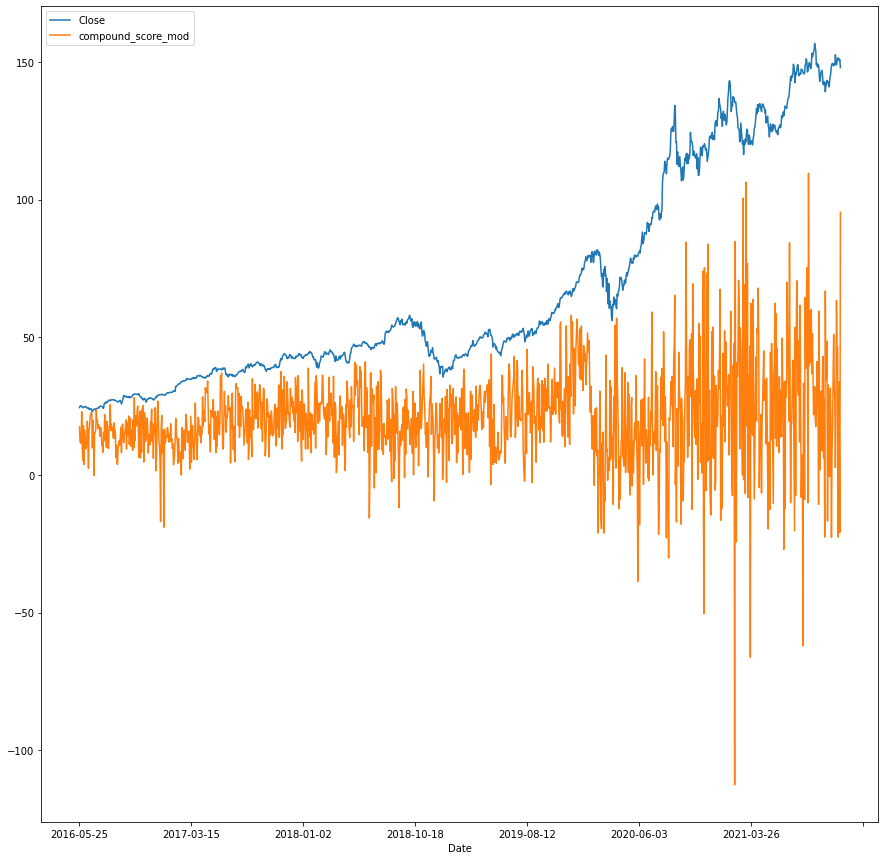

In [16]:
test[['Close', 'compound_score_mod']].plot(figsize = (15,15))

In [17]:
test1 = test.copy()

<AxesSubplot:xlabel='Date'>

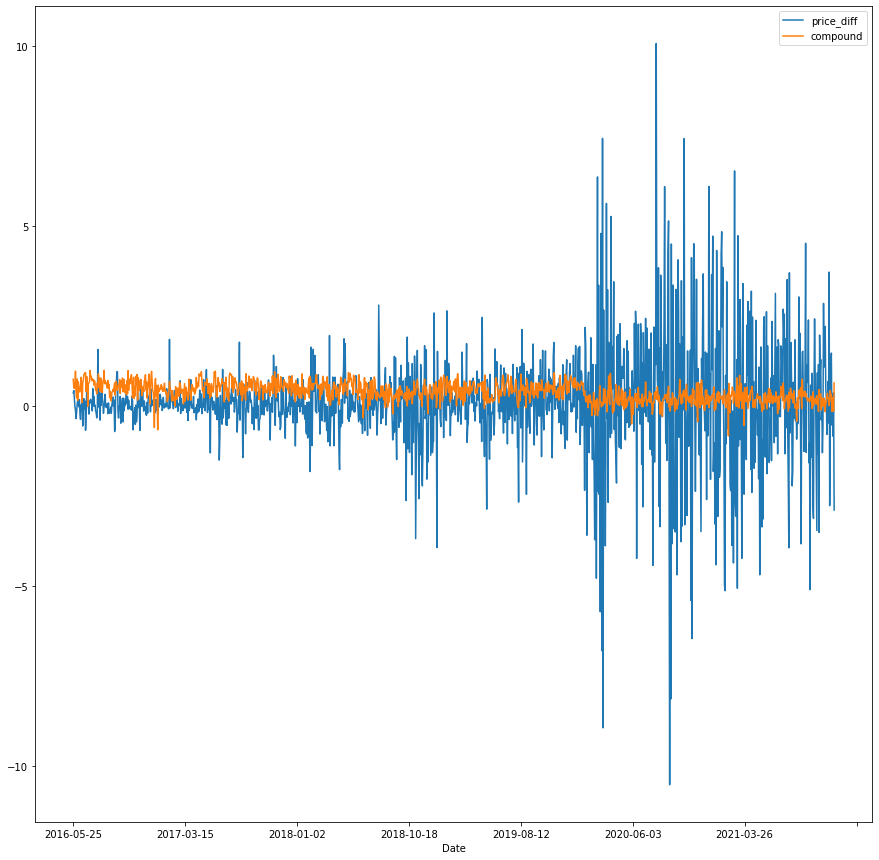

In [18]:
test1[['price_diff', 'compound']].plot(figsize = (15,15))

In [19]:
test1['same_sign'] = test1['price_diff']*test1['compound'] > 0 
print(test1['same_sign'].sum())
print(len(test1))

737
1361


### Linear Regression

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [21]:
xvar, yvar = test1[['SMA20', 'SMA50', 'SMA100']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

In [22]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

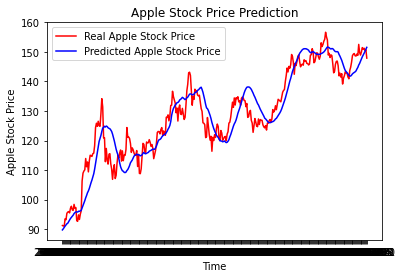

Mean squared error: 29.82
Coefficient of determination: 0.869
Adjusted R Squared: 0.868


In [23]:
pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  # It is the average of the squared difference between the predicted and actual value.
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))  # This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

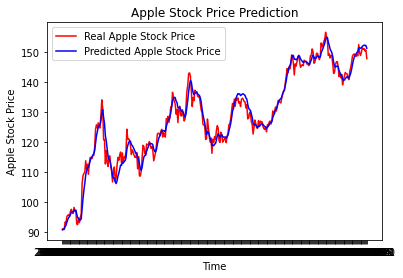

Mean squared error: 5.11
Coefficient of determination: 0.978
Adjusted R Squared: 0.977


In [24]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  # It is the average of the squared difference between the predicted and actual value.
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))  # This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

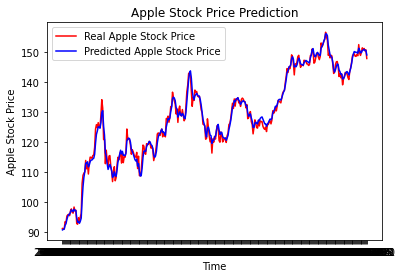

Mean squared error: 2.05
Coefficient of determination: 0.991
Adjusted R Squared: 0.991


In [25]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  # It is the average of the squared difference between the predicted and actual value.
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))  # This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

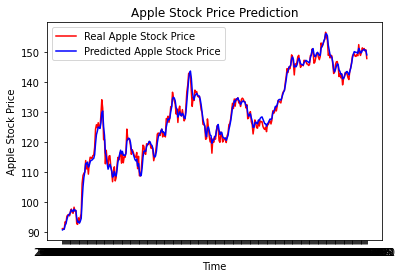

Mean squared error: 2.06
Coefficient of determination: 0.991
Adjusted R Squared: 0.991


In [26]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  # It is the average of the squared difference between the predicted and actual value.
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))  # This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

In [27]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [28]:
test.columns

Index(['neg', 'neu', 'pos', 'compound', 'probability', 'High', 'Low', 'Open',
       'Close', 'Volume', 'Adj Close', 'Movement', 'price_diff', 'TNX',
       'SMA20', 'SMA50', 'SMA100', 'EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal',
       'RSI', 'compound_score_mod'],
      dtype='object')

In [29]:
test2 = test.drop('Close', inplace=False, axis=1)    # inplace=False means the operation would not work on the original object. axis=1 means we are dropping the column, not the row.
test2.drop('Adj Close', inplace=True, axis=1)
test2.drop('price_diff', inplace=True, axis=1)
test2.drop('Movement', inplace=True, axis=1)
test2.drop('High', inplace=True, axis=1)
test2.drop('Low', inplace=True, axis=1)
test2.columns

Index(['neg', 'neu', 'pos', 'compound', 'probability', 'Open', 'Volume', 'TNX',
       'SMA20', 'SMA50', 'SMA100', 'EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal',
       'RSI', 'compound_score_mod'],
      dtype='object')

In [30]:
classifier = linear_model.LinearRegression()
xvar, yvar = test2, test1['Close']
x_train, x_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.25, random_state=0)

# Build step forward feature selection
forward_selection = sfs(classifier, n_features_to_select = 10, direction='forward', scoring='neg_mean_squared_error', cv=3)

# Perform SFFS
forward_selection = forward_selection.fit(x_train, y_train)

test2.columns[forward_selection.support_]

Index(['neu', 'Open', 'SMA20', 'SMA50', 'EMA10', 'EMA20', 'EMA40', 'MACD',
       'Signal', 'RSI'],
      dtype='object')

In [31]:
classifier = linear_model.LinearRegression()
xvar, yvar = test2, test1['Close']
x_train, x_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.25, random_state=0)

# Build step forward feature selection
backward_selection = sfs(classifier, n_features_to_select = 10, direction='backward', scoring='neg_mean_squared_error', cv=3)

# Perform SFFS
backward_selection = backward_selection.fit(x_train, y_train)

test2.columns[backward_selection.support_]

Index(['neg', 'Open', 'SMA20', 'SMA50', 'EMA10', 'EMA20', 'EMA40', 'MACD',
       'Signal', 'RSI'],
      dtype='object')

### Neural Network (Keras Regression)

#### Using Close Price

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [33]:
xvar, yvar = test1[['SMA20', 'SMA50', 'SMA100']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
numdim = len(xvar.columns)

kerasmodel = Sequential()
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(1, kernel_initializer='normal'))
kerasmodel.compile(loss='mean_squared_error', optimizer='adam')
kerasmodel.fit(xscaled, y_train, epochs=50, batch_size=10, verbose=0)

xtestscaled = scaler.transform(x_test)
y_pred = kerasmodel.predict(xtestscaled)

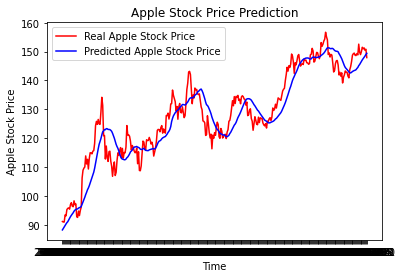

Mean squared error: 29.47
Coefficient of determination: 0.870
Adjusted R Squared: 0.869


In [35]:
pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

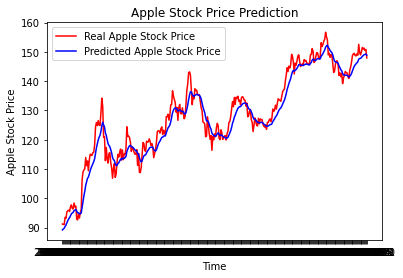

Mean squared error: 12.32
Coefficient of determination: 0.946
Adjusted R Squared: 0.945


In [36]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
numdim = len(xvar.columns)
kerasmodel = Sequential()
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(1, kernel_initializer='normal'))
kerasmodel.compile(loss='mean_squared_error', optimizer='adam')
kerasmodel.fit(xscaled, y_train, epochs=50, batch_size=10, verbose=0)

xtestscaled = scaler.transform(x_test)
y_pred = kerasmodel.predict(xtestscaled)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

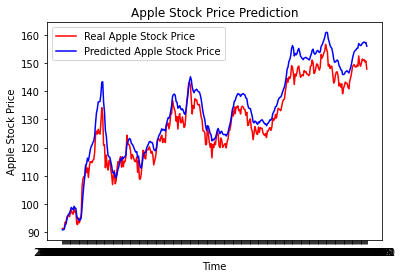

Mean squared error: 23.06
Coefficient of determination: 0.90
Adjusted R Squared: 0.897


In [37]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
numdim = len(xvar.columns)
kerasmodel = Sequential()
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(1, kernel_initializer='normal'))
kerasmodel.compile(loss='mean_squared_error', optimizer='adam')
kerasmodel.fit(xscaled, y_train, epochs=50, batch_size=10, verbose=0)

xtestscaled = scaler.transform(x_test)
y_pred = kerasmodel.predict(xtestscaled)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

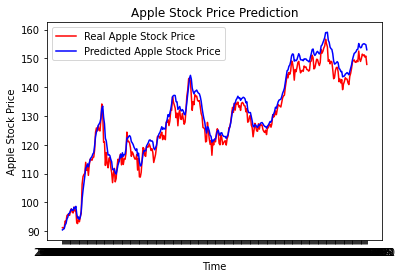

Mean squared error: 8.15
Coefficient of determination: 0.96
Adjusted R Squared: 0.963


In [38]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
numdim = len(xvar.columns)
kerasmodel = Sequential()
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(1, kernel_initializer='normal'))
kerasmodel.compile(loss='mean_squared_error', optimizer='adam')
kerasmodel.fit(xscaled, y_train, epochs=50, batch_size=10, verbose=0)

xtestscaled = scaler.transform(x_test)
y_pred = kerasmodel.predict(xtestscaled)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

#### Using Movement

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [40]:
xvar, yvar = test1[['SMA20', 'SMA50', 'SMA100']], test1['Movement']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtestscaled = scaler.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp.fit(xscaled,y_train)
predictions = mlp.predict(xtestscaled)

[[120  40]
 [133  48]]
Accuracy: 0.49266862170087977
Precision: 0.5454545454545454
Recall: 0.26519337016574585
F1 Score: 0.3568773234200744


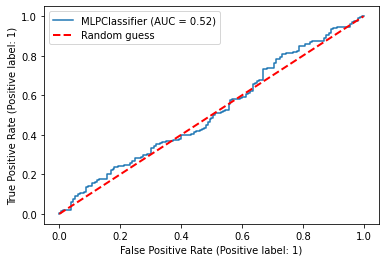

In [41]:
print(confusion_matrix(y_test,predictions))
#plot_confusion_matrix(mlp, x_test, y_test, cmap = 'Blues')
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1 Score:", metrics.f1_score(y_test, predictions))

metrics.plot_roc_curve(mlp, x_test, y_test) 
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
pyplot.legend()

[[  0 160]
 [  0 181]]
Accuracy: 0.530791788856305
Precision: 0.530791788856305
Recall: 1.0
F1 Score: 0.6934865900383141


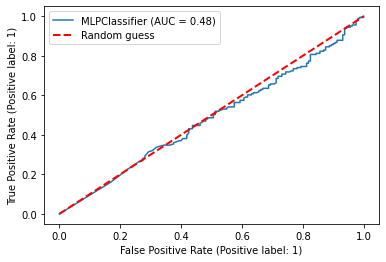

In [42]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40']], test1['Movement']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtestscaled = scaler.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp.fit(xscaled,y_train)
predictions = mlp.predict(xtestscaled)

print(confusion_matrix(y_test,predictions))
#plot_confusion_matrix(mlp, x_test, y_test, cmap = 'Blues')
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1 Score:", metrics.f1_score(y_test, predictions))

metrics.plot_roc_curve(mlp, x_test, y_test) 
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
pyplot.legend()

[[ 68  92]
 [ 36 145]]
Accuracy: 0.624633431085044
Precision: 0.6118143459915611
Recall: 0.8011049723756906
F1 Score: 0.69377990430622


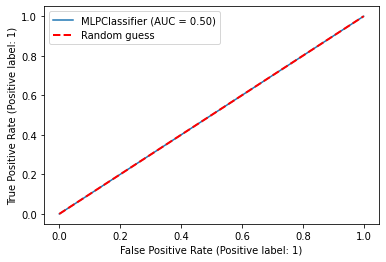

In [43]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI']], test1['Movement']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtestscaled = scaler.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp.fit(xscaled,y_train)
predictions = mlp.predict(xtestscaled)

print(confusion_matrix(y_test,predictions))
#plot_confusion_matrix(mlp, x_test, y_test, cmap = 'Blues')
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1 Score:", metrics.f1_score(y_test, predictions))

metrics.plot_roc_curve(mlp, x_test, y_test) 
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
pyplot.legend()

[[123  37]
 [ 83  98]]
Accuracy: 0.6480938416422287
Precision: 0.725925925925926
Recall: 0.5414364640883977
F1 Score: 0.620253164556962


C:\Users\Guo Xiong\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


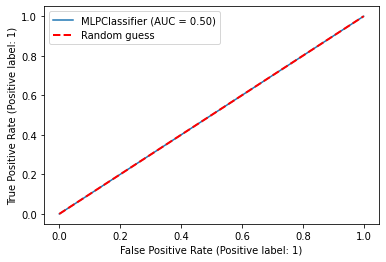

In [44]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume']], test1['Movement']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtestscaled = scaler.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp.fit(xscaled,y_train)
predictions = mlp.predict(xtestscaled)

print(confusion_matrix(y_test,predictions))
#plot_confusion_matrix(mlp, x_test, y_test, cmap = 'Blues')
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1 Score:", metrics.f1_score(y_test, predictions))

metrics.plot_roc_curve(mlp, x_test, y_test) 
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
pyplot.legend()

### LSTM

#### Univariate (using only Close Price)

In [45]:
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GlobalMaxPooling1D

In [46]:
df = DataReader("AAPL", 'yahoo', AAPL_start_date, AAPL_end_date) 
xtrain = df[:int(len(df)*0.75+1)].loc[:,'Close'].values
xtest = df[int(len(df)*0.75+1):].loc[:,'Close'].values

In [47]:
xtrain = xtrain.reshape(-1,1)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,1)
xtest = scaler.transform(xtest)

In [48]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

time_steps = 1
x_train, y_train = create_dataset(xtrain, time_steps)

In [49]:
x_train = np.reshape(x_train, (x_train.shape[0], time_steps, 1))    # reshape it to be [samples, time steps, features]
print(x_train.shape)

(1108, 1, 1)


In [50]:
LSTMmodel = Sequential()
LSTMmodel.add(LSTM(200, return_sequences = True))
LSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(LSTM(100, return_sequences = True))
LSTMmodel.add(GlobalMaxPooling1D())
LSTMmodel.add(Dense(100, kernel_initializer='normal', activation='relu'))
LSTMmodel.add(Dense(1, kernel_initializer='normal'))
LSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = LSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

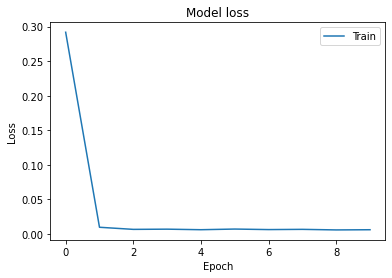

In [51]:
pyplot.plot(history.history['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Test'], loc='upper right')
pyplot.show()

In [52]:
x_test, y_test = create_dataset(xtest, time_steps)
y_test = y_test.reshape(-1,1)
org_y = scaler.inverse_transform(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], time_steps, 1))    # reshape it to be [samples, time steps, features]

In [53]:
predicted_y = LSTMmodel.predict(x_test)
predicted_y = scaler.inverse_transform(predicted_y)

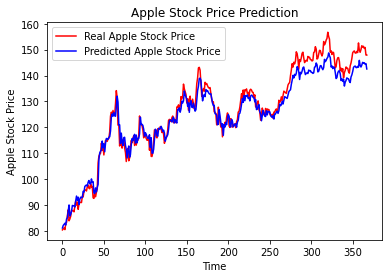

In [54]:
pyplot.plot(org_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

In [55]:
print("Mean squared error: %.2f" % metrics.mean_squared_error(org_y, predicted_y))  
print("Coefficient of determination: %.2f" % metrics.r2_score(org_y, predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(org_y, predicted_y)) * (len(org_y)-1) / (len(org_y)-x_test.shape[1]-1) ))

Mean squared error: 13.38
Coefficient of determination: 0.96
Adjusted R Squared: 0.957


#### Multivariate 

In [56]:
from pandas import DataFrame
from pandas import concat
from numpy import concatenate

In [57]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [58]:
numLSTM = 100
numNeurons = 100

In [59]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['SMA20', 'SMA50', 'SMA100', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['SMA20', 'SMA50', 'SMA100', 'Close']].values

In [60]:
numfeatures = xtrain.shape[1]
xtrain

array([[23.50774984, 25.56934998, 25.04992495, 24.47500038],
       [23.53024988, 25.54454998, 25.03582495, 24.90500069],
       [23.5999999 , 25.51674999, 25.02347496, 25.10250092],
       ...,
       [86.01449928, 79.43174988, 74.65344971, 88.40750122],
       [86.51362419, 79.82664993, 74.75427467, 90.44499969],
       [87.03187408, 80.26599991, 74.85324966, 91.19999695]])

In [61]:
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

In [62]:
reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,-1.550886,-1.416276,-1.438115,-1.474943,-1.549322,-1.418082,-1.439191,-1.446069
2,-1.549322,-1.418082,-1.439191,-1.446069,-1.544475,-1.420108,-1.440133,-1.432807
3,-1.544475,-1.420108,-1.440133,-1.432807,-1.538732,-1.422093,-1.440583,-1.433814
4,-1.538732,-1.422093,-1.440583,-1.433814,-1.533329,-1.424301,-1.440743,-1.442040
5,-1.533329,-1.424301,-1.440743,-1.442040,-1.530479,-1.427015,-1.440360,-1.465542
...,...,...,...,...,...,...,...,...
1016,2.685296,2.427629,2.319458,3.034687,2.721739,2.454225,2.329100,2.926072
1017,2.721739,2.454225,2.329100,2.926072,2.762213,2.483517,2.339816,3.006316
1018,2.762213,2.483517,2.339816,3.006316,2.793218,2.507901,2.346450,2.818128
1019,2.793218,2.507901,2.346450,2.818128,2.827906,2.536672,2.354142,2.954946


In [63]:
reframedxtrain.drop(reframedxtrain.columns[[4,5,6]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[4,5,6]], axis=1, inplace=True)    # dropping coloumns not used for prediction
reframedxtrain

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var4(t)
1,-1.550886,-1.416276,-1.438115,-1.474943,-1.446069
2,-1.549322,-1.418082,-1.439191,-1.446069,-1.432807
3,-1.544475,-1.420108,-1.440133,-1.432807,-1.433814
4,-1.538732,-1.422093,-1.440583,-1.433814,-1.442040
5,-1.533329,-1.424301,-1.440743,-1.442040,-1.465542
...,...,...,...,...,...
1016,2.685296,2.427629,2.319458,3.034687,2.926072
1017,2.721739,2.454225,2.329100,2.926072,3.006316
1018,2.762213,2.483517,2.339816,3.006316,2.818128
1019,2.793218,2.507901,2.346450,2.818128,2.954946


In [64]:
x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]

In [65]:
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

In [66]:
varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

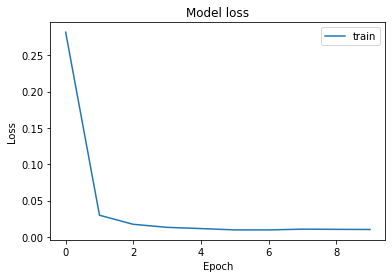

In [67]:
pyplot.plot(history.history['loss'], label='train')
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()

In [68]:
predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

In [69]:
y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

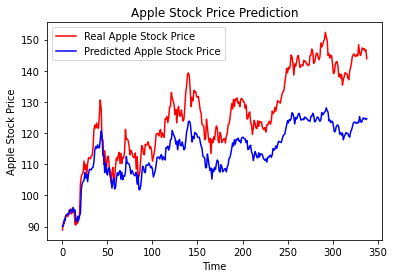

Mean squared error: 167.57
Coefficient of determination: 0.186
Adjusted R Squared: 0.176


In [70]:
pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

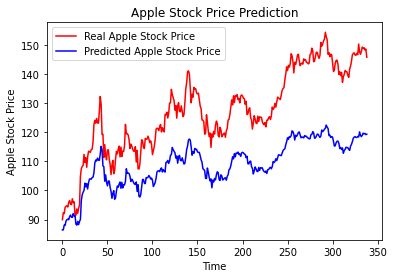

Mean squared error: 371.99
Coefficient of determination: -0.749
Adjusted R Squared: -0.770


In [71]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['EMA10', 'EMA20', 'EMA40', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['EMA10', 'EMA20', 'EMA40', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[4,5,6]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[4,5,6]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

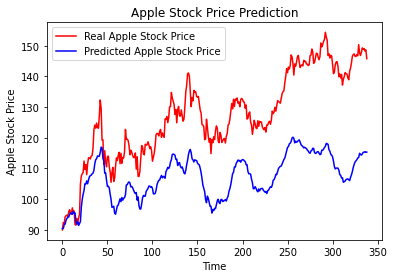

Mean squared error: 473.30
Coefficient of determination: -1.226
Adjusted R Squared: -1.273


In [72]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[7,8,9,10,11,12]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[7,8,9,10,11,12]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

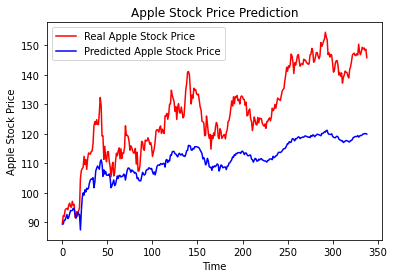

Mean squared error: 318.68
Coefficient of determination: -0.499
Adjusted R Squared: -0.526


In [73]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['EMA10', 'EMA20', 'EMA40', 'TNX', 'Volume', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['EMA10', 'EMA20', 'EMA40', 'TNX', 'Volume', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[6,7,8,9,10]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[6,7,8,9,10]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

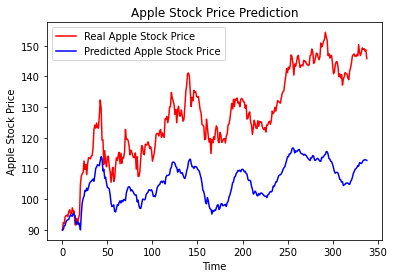

Mean squared error: 556.50
Coefficient of determination: -1.617
Adjusted R Squared: -1.689


In [74]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[9,10,11,12,13,14,15,16]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[9,10,11,12,13,14,15,16]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

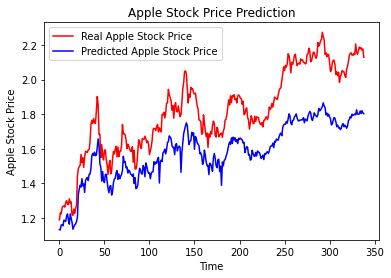

Mean squared error: 0.06
Coefficient of determination: -0.001
Adjusted R Squared: -0.013


In [75]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['compound', 'probability', 'Movement', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['compound', 'probability', 'Movement', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[4,5,6]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[4,5,6]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))